In [1]:
# importing the modules

import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading the training model

detector=tf.keras.models.load_model("emotion_detector.keras")

In [3]:
# defining class names

class_names=['angry', 'happy', 'relaxed', 'sad']

In [4]:
# function to load and preprocess image

def image_processing(image_paths):
    images=[]
    for path in image_paths:
        image=cv2.imread(path)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image=cv2.resize(image,(192,192))
        images.append(image)
    images=np.asarray(images)
    return images

In [5]:
# image path
image1="images_for_test\\image1.webp"
image2="images_for_test\\image2.png"
image3="images_for_test\\image3.jpg"
image4="images_for_test\\image4.webp"

image_paths=[image1,image2,image3,image4]

images=image_processing(image_paths)

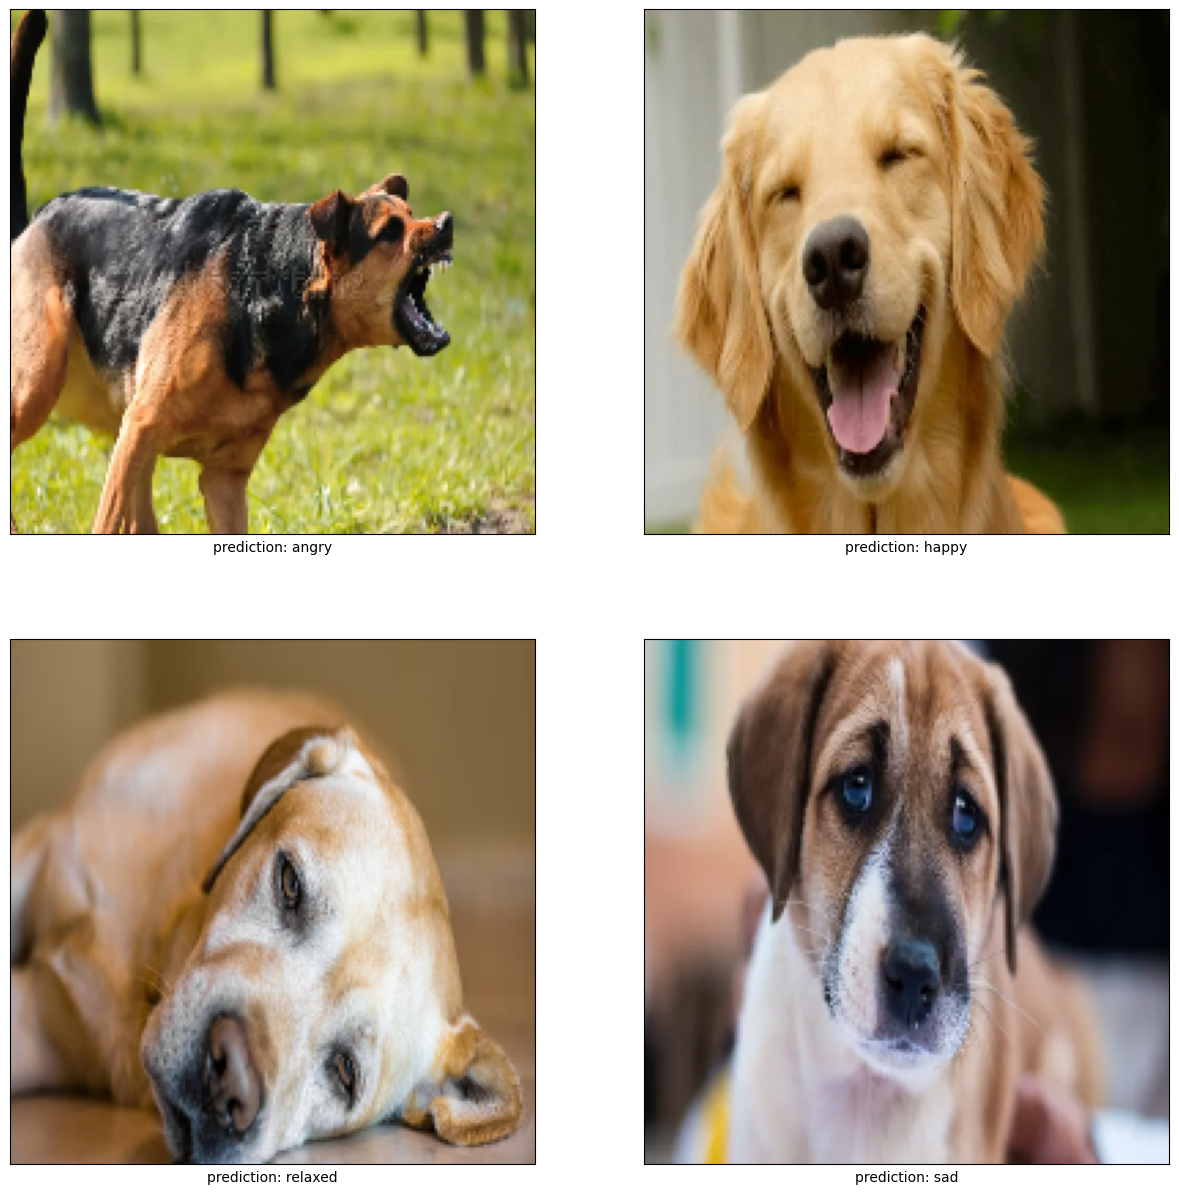

In [6]:
# prediction of images

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

i = 0
for x in range(2):
    for y in range(2):
        prediction = detector.predict(images[i][None, ...], verbose=0)[0]
        
        axs[x][y].set_xticks([])
        axs[x][y].set_yticks([])
        axs[x][y].set_xlabel(f'prediction: {class_names[np.argmax(prediction)]}')
        
        axs[x][y].imshow(images[i])
        
        i += 1
plt.show()